#Assignment

In [ ]:
!git clone https://github.com/MohammedAlghamdi/imagenet10.git

Cloning into 'imagenet10'...
remote: Enumerating objects: 10019, done.
remote: Total 10019 (delta 0), reused 0 (delta 0), pack-reused 10019
Receiving objects: 100% (10019/10019), 966.71 MiB | 49.88 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Checking out files: 100% (10002/10002), done.


#Basic Steps

In [2]:
"""
Q1: PyTorch dataset class for ImageNet10.

"""
from torch.utils.data import Dataset
from PIL import Image
from torch import nn, optim
from torchvision import transforms, datasets
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np # linear algebra

import matplotlib.pyplot as plt
from matplotlib import image as mp_image
import seaborn as sns

# Required magic to display matplotlib plots in notebooks
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import shutil
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

#from imagenet10 import ImageNet10

import pandas as pd
import os

#from config import *

In [3]:
class ImageNet10(Dataset):
    """Q1: ImageNet10 dataset. """

    def __init__(self, df, transform=None):
        """
        Args:
            df (DataFrame object): Dataframe containing the images, paths and classes
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        # Load image from path and get label
        x = Image.open(self.df['path'][index])
        try:
          x = x.convert('RGB') # To deal with some grayscale images in the data
        except:
          pass
        y = torch.tensor(int(self.df['class'][index]))

        if self.transform:
            x = self.transform(x)

        return x, y

config.py file

In [4]:
"""

Q1: config.py

Defines config variables 
"""

# Define where your training and validation data is
# TODO: change this to your data root as needed"""

ROOT_DIR = "imagenet10/train_set/" #/content/imagenet10/test_set
ROOT_DIR_test = "imagenet10/test_set/"

NORM_MEAN = [0.52283615, 0.47988218, 0.40605107]
NORM_STD = [0.29770654, 0.2888402, 0.31178293]

In [5]:
# Define the class labels
CLASS_LABELS = [
  "baboon",
  "banana",
  "canoe",
  "cat",
  "desk",
  "drill",
  "dumbbell",
  "football",
  "mug",
  "orange",
]

In [6]:
# Gathers the meta data for the images
paths, classes = [], []
for i, dir_ in enumerate(CLASS_LABELS):
    for entry in os.scandir(ROOT_DIR + dir_):
        if (entry.is_file()):
            paths.append(entry.path)
            classes.append(i)
            
data = {
    'path': paths,
    'class': classes
}

data_df = pd.DataFrame(data, columns=['path', 'class'])
data_df = data_df.sample(frac=1).reset_index(drop=True) # Shuffles the data

# See what the dataframe now contains
print("Found", len(data_df), "images.")
# If you want to see the image meta data
print(data_df.head())


Found 9000 images.
                                               path  class
0      imagenet10/train_set/cat/n02123159_6555.JPEG      3
1  imagenet10/train_set/baboon/n02486410_11178.JPEG      0
2    imagenet10/train_set/desk/n03179701_11465.JPEG      4
3  imagenet10/train_set/banana/n07753592_12208.JPEG      1
4   imagenet10/train_set/drill/n03239726_12977.JPEG      5


In [7]:
# Split the data into train and test sets and instantiate our new ImageNet10 objects.
train_split = 0.80 # Defines the ratio of train/valid data.
train_size = int(len(data_df)*train_split)
valid_size = len(data_df) - train_size

train_size, valid_size

(7200, 1800)

In [8]:
"""data_transform = transforms.Compose([
        transforms.Resize(128),
        transforms.CenterCrop(128),
        transforms.ToTensor(),
        transforms.Normalize(NORM_MEAN, NORM_STD),
    ])
    """
data_transform = transforms.Compose([
        transforms.Resize(128),
        transforms.CenterCrop(128),
        #transforms.Pad(10),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(degrees=(180)),
        transforms.ToTensor(),
        transforms.Normalize(NORM_MEAN, NORM_STD),
    ])

dataset_train = ImageNet10(
    df=data_df[:train_size],
    transform=data_transform,
)

dataset_valid = ImageNet10(
    df=data_df[train_size:].reset_index(drop=True),
    transform=data_transform,
)
# Data loaders for use during training
train_loader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=128,
    shuffle=True,
    num_workers=2
)

valid_loader = torch.utils.data.DataLoader(
    dataset_valid,
    batch_size=64,
    shuffle=True,
    num_workers=2
)

# See what you've loaded
print("len(dataset_train)", len(dataset_train))
print("len(dataset_valid)", len(dataset_valid))

print("len(train_loader)", len(train_loader))
print("len(valid_loader)", len(valid_loader))

len(dataset_train) 7200
len(dataset_valid) 1800
len(train_loader) 57
len(valid_loader) 29


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


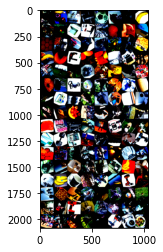

labels ['cat', 'banana', 'drill', 'dumbbell', 'football', 'cat', 'cat', 'banana', 'dumbbell', 'orange']


In [9]:
#Naming change
def timshow(x):
    xa = np.transpose(x.numpy(),(1,2,0))
    plt.imshow(xa)
    plt.show()
    
# get some random training images using the data loader
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images and labels
timshow(torchvision.utils.make_grid(images))

print(f"labels {[CLASS_LABELS[labels[i]] for i in range(10)]}")

A linear classifier

 # single layer without complexicity

In [ ]:
#Name  change
net_single = nn.Sequential(
    nn.Flatten(),
    
    # single layer without complexicity
    nn.Linear(3*128*128, 10),
    
    # two layers
    #nn.Linear(100, 300),
    
    
    
    #nn.Linear(300,10)
)

for param in net_single.parameters():
    print(param.shape)


torch.Size([10, 49152])
torch.Size([10])


Test Losses

In [ ]:
nepochs = 30
losses1 = np.zeros(nepochs)  # update to losses2 for two-layer network
mean_loss = []
epoch_nums = []

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_single.parameters(), lr=0.001)

for epoch in range(nepochs):  # loop over the dataset multiple times

    running_loss = 0.0
    n = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
         # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and update parameters
        outputs = net_single(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
    
        # accumulate loss
        running_loss += loss.item()
        n += 1
       
    losses1[epoch] = meanloss = running_loss / n
    print(f"epoch: {epoch+1} loss: {meanloss : .3f}")
    mean_loss.append(meanloss)
    epoch_nums.append(epoch)

epoch: 1 loss:  8.722
epoch: 2 loss:  6.775
epoch: 3 loss:  6.127
epoch: 4 loss:  5.515
epoch: 5 loss:  4.329
epoch: 6 loss:  5.384
epoch: 7 loss:  4.443
epoch: 8 loss:  3.668
epoch: 9 loss:  3.342
epoch: 10 loss:  3.410
epoch: 11 loss:  3.427
epoch: 12 loss:  3.504
epoch: 13 loss:  2.730
epoch: 14 loss:  2.683
epoch: 15 loss:  2.964
epoch: 16 loss:  2.363
epoch: 17 loss:  2.489
epoch: 18 loss:  1.906
epoch: 19 loss:  2.024
epoch: 20 loss:  2.213
epoch: 21 loss:  2.673
epoch: 22 loss:  2.414
epoch: 23 loss:  2.566
epoch: 24 loss:  1.582
epoch: 25 loss:  1.832
epoch: 26 loss:  1.478
epoch: 27 loss:  1.775
epoch: 28 loss:  2.164
epoch: 29 loss:  2.528
epoch: 30 loss:  2.605


Valid Losses

In [ ]:
nepochs = 30
losses1 = np.zeros(nepochs)  # update to losses2 for two-layer network
mean_loss_valid = []
epoch_nums_valid = []

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_single.parameters(), lr=0.001)

for epoch in range(nepochs):  # loop over the dataset multiple times

    running_loss = 0.0
    n = 0
    for i, data in enumerate(valid_loader, 0):
        inputs, labels = data
        
         # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and update parameters
        outputs = net_single(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
    
        # accumulate loss
        running_loss += loss.item()
        n += 1
       
    losses1[epoch] = meanloss = running_loss / n
    print(f"epoch: {epoch+1} valid_loss: {meanloss : .3f}")
    mean_loss_valid.append(meanloss)
    epoch_nums_valid.append(epoch)

epoch: 1 valid_loss:  15.108
epoch: 2 valid_loss:  11.910
epoch: 3 valid_loss:  8.761
epoch: 4 valid_loss:  7.805
epoch: 5 valid_loss:  6.706
epoch: 6 valid_loss:  5.685
epoch: 7 valid_loss:  6.163
epoch: 8 valid_loss:  4.768
epoch: 9 valid_loss:  4.249
epoch: 10 valid_loss:  4.346
epoch: 11 valid_loss:  4.154
epoch: 12 valid_loss:  2.944
epoch: 13 valid_loss:  3.742
epoch: 14 valid_loss:  3.308
epoch: 15 valid_loss:  2.284
epoch: 16 valid_loss:  1.936
epoch: 17 valid_loss:  1.560
epoch: 18 valid_loss:  1.783
epoch: 19 valid_loss:  1.247
epoch: 20 valid_loss:  1.898
epoch: 21 valid_loss:  1.235
epoch: 22 valid_loss:  1.237
epoch: 23 valid_loss:  1.087
epoch: 24 valid_loss:  1.769
epoch: 25 valid_loss:  1.136
epoch: 26 valid_loss:  0.709
epoch: 27 valid_loss:  0.287
epoch: 28 valid_loss:  0.480
epoch: 29 valid_loss:  1.269
epoch: 30 valid_loss:  1.311


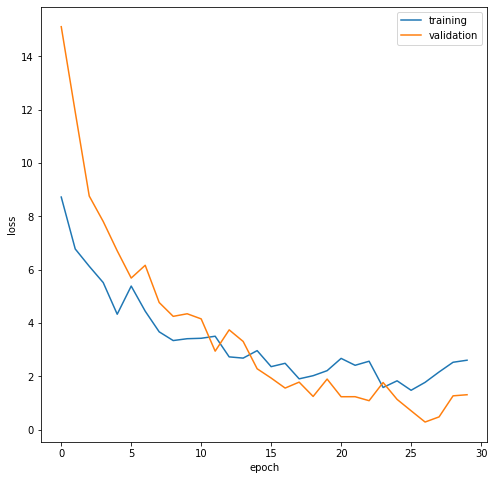

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(epoch_nums, mean_loss),
plt.plot(epoch_nums,  mean_loss_valid)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = net_single(images)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)    # add in the number of labels in this minibatch
        correct += (predicted == labels).sum().item()  # add in the number of correct labels
        training_loss = correct/total
print(f"Accuracy of the network on the Train images: {training_loss : .1%}")

Accuracy of the network on the Train images:  45.4%


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in valid_loader:
        images, labels = data
        outputs = net_single(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)    # add in the number of labels in this minibatch
        correct += (predicted == labels).sum().item()  # add in the number of correct labels
        validation_loss = correct/total
print(f"Accuracy of the network on the valid images: {validation_loss : .1%}")

Accuracy of the network on the valid images:  87.9%


#Single batch with Multi Layer, Relu, Maxpool

In [ ]:
#change namings and layers numbers
net_single_max = nn.Sequential(
    nn.Flatten(),
    
    # single layer
    nn.Linear(3*128*128, 100),
    
    # two layers
    nn.Linear(100, 300),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Linear(300,10)
)

for param in net_single_max.parameters():
    print(param.shape)


torch.Size([100, 49152])
torch.Size([100])
torch.Size([300, 100])
torch.Size([300])
torch.Size([10, 300])
torch.Size([10])


In [ ]:
print(net_single_max)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=49152, out_features=100, bias=True)
  (2): Linear(in_features=100, out_features=300, bias=True)
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Linear(in_features=300, out_features=10, bias=True)
)


In [ ]:
nepochs = 30
losses1 = np.zeros(nepochs)  # update to losses2 for two-layer network
mean_loss = []
epoch_nums = []

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_single.parameters(), lr=0.001)

for epoch in range(nepochs):  # loop over the dataset multiple times

    running_loss = 0.0
    n = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
         # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and update parameters
        outputs = net_single(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
    
        # accumulate loss
        running_loss += loss.item()
        n += 1
       
    losses1[epoch] = meanloss = running_loss / n
    print(f"epoch: {epoch+1} loss: {meanloss : .3f}")
    mean_loss.append(meanloss)
    epoch_nums.append(epoch)

epoch: 1 loss:  4.463
epoch: 2 loss:  2.754
epoch: 3 loss:  2.399
epoch: 4 loss:  2.383
epoch: 5 loss:  1.977
epoch: 6 loss:  1.742
epoch: 7 loss:  1.594
epoch: 8 loss:  1.535
epoch: 9 loss:  1.549
epoch: 10 loss:  1.562
epoch: 11 loss:  1.766
epoch: 12 loss:  1.640
epoch: 13 loss:  2.062
epoch: 14 loss:  1.365
epoch: 15 loss:  0.805
epoch: 16 loss:  1.209
epoch: 17 loss:  1.460
epoch: 18 loss:  1.197
epoch: 19 loss:  1.379
epoch: 20 loss:  0.973
epoch: 21 loss:  1.021
epoch: 22 loss:  0.916
epoch: 23 loss:  1.557
epoch: 24 loss:  1.740
epoch: 25 loss:  1.262
epoch: 26 loss:  1.002
epoch: 27 loss:  0.656
epoch: 28 loss:  1.117
epoch: 29 loss:  1.013
epoch: 30 loss:  1.275


In [ ]:
nepochs = 30
losses1 = np.zeros(nepochs)  # update to losses2 for two-layer network
mean_loss_valid = []
epoch_nums_valid = []

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_single.parameters(), lr=0.001)

for epoch in range(nepochs):  # loop over the dataset multiple times

    running_loss = 0.0
    n = 0
    for i, data in enumerate(valid_loader, 0):
        inputs, labels = data
        
         # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and update parameters
        outputs = net_single(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
    
        # accumulate loss
        running_loss += loss.item()
        n += 1
       
    losses1[epoch] = meanloss = running_loss / n
    print(f"epoch: {epoch+1} valid_loss: {meanloss : .3f}")
    mean_loss_valid.append(meanloss)
    epoch_nums_valid.append(epoch)

epoch: 1 valid_loss:  12.179
epoch: 2 valid_loss:  8.290
epoch: 3 valid_loss:  5.925
epoch: 4 valid_loss:  4.533
epoch: 5 valid_loss:  4.511
epoch: 6 valid_loss:  4.547
epoch: 7 valid_loss:  3.352
epoch: 8 valid_loss:  2.883
epoch: 9 valid_loss:  1.957
epoch: 10 valid_loss:  1.938
epoch: 11 valid_loss:  1.367
epoch: 12 valid_loss:  1.776
epoch: 13 valid_loss:  1.958
epoch: 14 valid_loss:  1.454
epoch: 15 valid_loss:  1.147
epoch: 16 valid_loss:  0.982
epoch: 17 valid_loss:  1.236
epoch: 18 valid_loss:  0.971
epoch: 19 valid_loss:  0.482
epoch: 20 valid_loss:  0.248
epoch: 21 valid_loss:  0.206
epoch: 22 valid_loss:  0.372
epoch: 23 valid_loss:  0.370
epoch: 24 valid_loss:  0.244
epoch: 25 valid_loss:  0.269
epoch: 26 valid_loss:  0.976
epoch: 27 valid_loss:  0.627
epoch: 28 valid_loss:  0.939
epoch: 29 valid_loss:  0.844
epoch: 30 valid_loss:  0.617


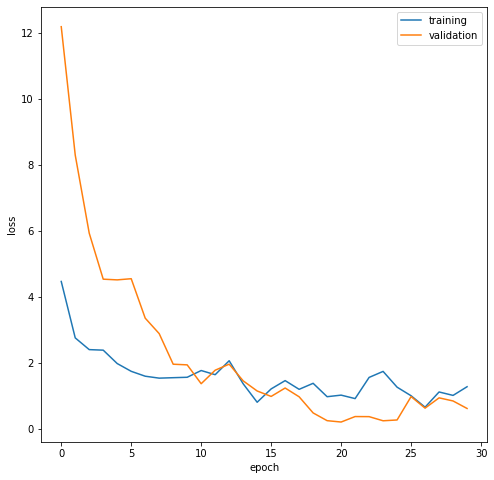

In [ ]:
#name change
plt.figure(figsize=(8,8))
plt.plot(epoch_nums, mean_loss),
plt.plot(epoch_nums,  mean_loss_valid)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = net_single(images)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)    # add in the number of labels in this minibatch
        correct += (predicted == labels).sum().item()  # add in the number of correct labels
        training_loss = correct/total
print(f"Accuracy of the network on the Train images: {training_loss : .1%}")

Accuracy of the network on the Train images:  69.7%


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in valid_loader:
        images, labels = data
        outputs = net_single(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)    # add in the number of labels in this minibatch
        correct += (predicted == labels).sum().item()  # add in the number of correct labels
        validation_loss = correct/total
print(f"Accuracy of the network on the valid images: {validation_loss : .1%}")

Accuracy of the network on the valid images:  90.6%


# Multi Batch Network

In [10]:
# Defining the Constructor
class Net(nn.Module):
      def __init__(self, num_classes=10):
        super(Net, self).__init__()
        # In the init function, we define each layer we will use in our model
        # Our images are RGB, so we have input channels = 3.
        # We will apply 12 filters in the first convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride=1, padding=1)
        # A second convolutional layer takes 12 input channels, and generates 6 outputs
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.drop = nn.Dropout2d(p=0.1)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=24, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=24, out_channels=32, kernel_size=3, stride=1, padding=1)
        # We in the end apply max pooling with a kernel size of 2
        self.pool = nn.MaxPool2d(kernel_size=2)
        # A drop layer deletes 20% of the features to help prevent overfitting
        self.drop = nn.Dropout2d(p=0.1)
        # Our 128x128 image tensors will be pooled twice with a kernel size of 2, 128/2/2 is 32.
        # This means that our fea# We need to flatten these in order to feed them to a fully-connected layer
        self.fc1 = nn.Linear(8 * 8 * 32, 1000)
        self.fc2 = nn.Linear(1000, 500)
        self.fc3 = nn.Linear(500, 10)
      def forward(self, x):
        # In the forward function, pass the data through the layers we defined in the init function
        # Use a ReLU activation function after layer 1 (convolution 1 and pool)
        x = F.relu(self.pool(self.conv1(x)))
        # Use a ReLU activation function after layer 2
        x = F.relu(self.pool(self.conv2(x)))
        x = F.relu(self.pool(self.conv3(x)))
        x = F.relu(self.pool(self.conv4(x)))
        # Select some features to drop to prevent overfitting (only drop during training)
        x = F.dropout(self.drop(x), training=self.training)
        # Flatten (# Our 128x128 image tensors will be pooled twice with a kernel size of 2. 128/2/2 is 32.
        # This means that our feature tensors are now 32 x 32, and we've generated 6 of them))
        x = x.view(-1, 8 * 8 * 32)
        # Feed to fully-connected layer to predict class
        # Apply FC layer
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        # Return class probabilities via a log_softmax function
        return torch.log_softmax(x, dim=1)
#device = "cpu"
if (torch.cuda.is_available()):
    # if GPU available, use cuda (on a cpu, training will take a considerable length of time!)
    device = "cuda"
else:
  device ="cpu"
# Create an instance of the model class and allocate it to the device
#model = Net(num_classes=len(classes)).to(device)
model = Net().to(device)
print(model)

Net(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (drop): Dropout2d(p=0.1, inplace=False)
  (conv3): Conv2d(16, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(24, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=10, bias=True)
)


In [11]:
def train(model, device, train_loader, optimizer, epoch):
    # Set the model to training mode
    model.train()
    train_loss = 0
    correct = 0
    print("Epoch:", epoch)
    # Process the images in batches
    for batch_idx, (data, target) in enumerate(train_loader):
        # Use the CPU or GPU as appropriate
        # Recall that GPU is optimized for the operations we are dealing with
        data, target = data.to(device), target.to(device)
        
        
        # Reset the optimizer
        optimizer.zero_grad()
        
        # Push the data forward through the model layers
        output = model(data)
        
        # Get the loss
        loss = loss_criteria(output, target)

        # Keep a running total
        train_loss += loss.item()
        # Calculate the accuracy for this batch
        _, predicted = torch.max(output.data, 1)
        correct += torch.sum(target==predicted).item()
        # Backpropagate
        loss.backward()
        optimizer.step()
        
        # Print metrics so we see some progress
        print('\tTraining batch {} Loss: {:.6f}'.format(batch_idx + 1, loss.item()))
            
    # return average loss for the epoch
    avg_loss = train_loss / (batch_idx+1)
    #print('Training set: Average loss: {:.6f}'.format(avg_loss))
    print('Training set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(train_loader.dataset),
        100. * correct / len(train_loader.dataset)))
    return avg_loss

In [12]:
def valid(model, device, valid_loader):
    # Switch the model to evaluation mode (so we don't backpropagate or drop)
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        batch_count = 0
        for data, target in valid_loader:
            batch_count += 1
            data, target = data.to(device), target.to(device)
            
            # Get the predicted classes for this batch
            output = model(data)
            
            # Calculate the loss for this batch
            test_loss += loss_criteria(output, target).item()
            
            # Calculate the accuracy for this batch
            _, predicted = torch.max(output.data, 1)
            correct += torch.sum(target==predicted).item()

    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss / batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(valid_loader.dataset),
        100. * correct / len(valid_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss

In [12]:
device

'cuda'

In [13]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Specify the loss criteria
loss_criteria = nn.CrossEntropyLoss()

# Track metrics in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 20 epochs (We restrict to 4 for time issues)
epochs = 60
print('Training on', device)
for epoch in range(1, epochs + 1):
        train_loss = train(model, device, train_loader, optimizer, epoch)
        valid_loss = valid(model, device, valid_loader)
        epoch_nums.append(epoch)
        training_loss.append(train_loss)
        validation_loss.append(valid_loss)

Training on cuda
Epoch: 1
	Training batch 1 Loss: 2.302750
	Training batch 2 Loss: 2.319436
	Training batch 3 Loss: 2.316094
	Training batch 4 Loss: 2.286545
	Training batch 5 Loss: 2.265483
	Training batch 6 Loss: 2.309286
	Training batch 7 Loss: 2.255989
	Training batch 8 Loss: 2.224088
	Training batch 9 Loss: 2.137681
	Training batch 10 Loss: 2.318585
	Training batch 11 Loss: 2.213774
	Training batch 12 Loss: 2.178223
	Training batch 13 Loss: 2.330255
	Training batch 14 Loss: 2.224864
	Training batch 15 Loss: 2.209637
	Training batch 16 Loss: 2.307672
	Training batch 17 Loss: 2.202689
	Training batch 18 Loss: 2.205208
	Training batch 19 Loss: 2.198636
	Training batch 20 Loss: 2.154934
	Training batch 21 Loss: 2.172680
	Training batch 22 Loss: 2.117208
	Training batch 23 Loss: 2.124513
	Training batch 24 Loss: 2.065383
	Training batch 25 Loss: 2.006535
	Training batch 26 Loss: 2.131928
	Training batch 27 Loss: 2.003297
	Training batch 28 Loss: 2.020568
	Training batch 29 Loss: 2.0829

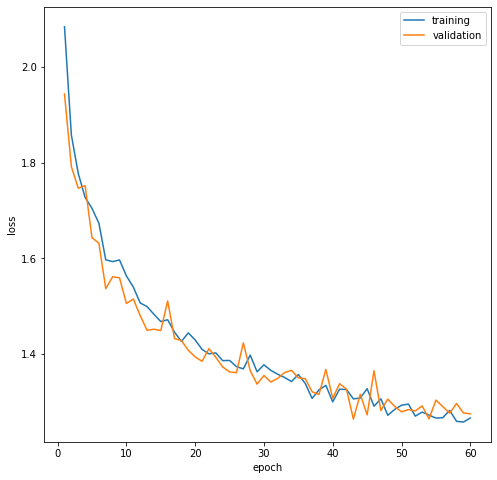

In [14]:
plt.figure(figsize=(8,8))
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
# Specify a path
PATH = "entire_model1.pth"

# Save
torch.save(net, PATH)

In [ ]:
#another way to save model
#torch.save(model.state_dict(), '/content/my_model')

Getting predictions from valid set...
torch.Size([128, 3, 128, 128]) torch.Size([128])
torch.Size([128, 3, 128, 128]) torch.Size([128])
torch.Size([128, 3, 128, 128]) torch.Size([128])
torch.Size([128, 3, 128, 128]) torch.Size([128])
torch.Size([128, 3, 128, 128]) torch.Size([128])
torch.Size([128, 3, 128, 128]) torch.Size([128])
torch.Size([128, 3, 128, 128]) torch.Size([128])
torch.Size([128, 3, 128, 128]) torch.Size([128])
torch.Size([128, 3, 128, 128]) torch.Size([128])
torch.Size([128, 3, 128, 128]) torch.Size([128])
torch.Size([128, 3, 128, 128]) torch.Size([128])
torch.Size([128, 3, 128, 128]) torch.Size([128])
torch.Size([128, 3, 128, 128]) torch.Size([128])
torch.Size([128, 3, 128, 128]) torch.Size([128])
torch.Size([8, 3, 128, 128]) torch.Size([8])


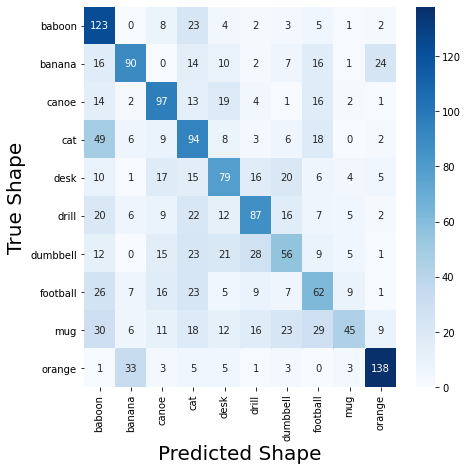

In [ ]:
#valid set
truelabels = []
predictions = []
model.eval()

print("Getting predictions from valid set...")

for data, target in valid_loader:
  print(data.shape, target.shape)
  for label in target.data.numpy():
      truelabels.append(label)
  for prediction in model(data).data.numpy().argmax(1):
      predictions.append(prediction)

# Plot the confusion matrix
cm = confusion_matrix(truelabels, predictions)
tick_marks = np.arange(len(CLASS_LABELS))

df_cm = pd.DataFrame(cm, index = CLASS_LABELS, columns = CLASS_LABELS) #change cm to [cm] or vice-versa
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel("Predicted Shape", fontsize = 20)
plt.ylabel("True Shape", fontsize = 20)
plt.show()

Getting predictions from train set...
torch.Size([64, 3, 128, 128]) torch.Size([64])
torch.Size([64, 3, 128, 128]) torch.Size([64])
torch.Size([64, 3, 128, 128]) torch.Size([64])
torch.Size([64, 3, 128, 128]) torch.Size([64])
torch.Size([64, 3, 128, 128]) torch.Size([64])
torch.Size([64, 3, 128, 128]) torch.Size([64])
torch.Size([64, 3, 128, 128]) torch.Size([64])
torch.Size([64, 3, 128, 128]) torch.Size([64])
torch.Size([64, 3, 128, 128]) torch.Size([64])
torch.Size([64, 3, 128, 128]) torch.Size([64])
torch.Size([64, 3, 128, 128]) torch.Size([64])
torch.Size([64, 3, 128, 128]) torch.Size([64])
torch.Size([64, 3, 128, 128]) torch.Size([64])
torch.Size([64, 3, 128, 128]) torch.Size([64])
torch.Size([64, 3, 128, 128]) torch.Size([64])
torch.Size([64, 3, 128, 128]) torch.Size([64])
torch.Size([64, 3, 128, 128]) torch.Size([64])
torch.Size([64, 3, 128, 128]) torch.Size([64])
torch.Size([64, 3, 128, 128]) torch.Size([64])
torch.Size([64, 3, 128, 128]) torch.Size([64])
torch.Size([64, 3, 128

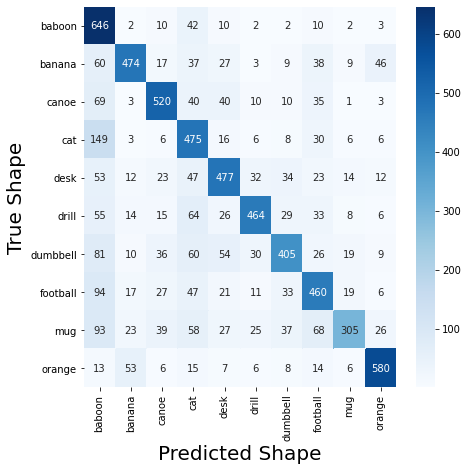

In [ ]:
#train set
truelabels = []
predictions = []
model.eval()

print("Getting predictions from train set...")

for data, target in train_loader:
  print(data.shape, target.shape)
  for label in target.data.numpy():
      truelabels.append(label)
  for prediction in model(data).data.numpy().argmax(1):
      predictions.append(prediction) 

# Plot the confusion matrix
cm = confusion_matrix(truelabels, predictions)
tick_marks = np.arange(len(CLASS_LABELS))

df_cm = pd.DataFrame(cm, index = CLASS_LABELS, columns = CLASS_LABELS)
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel("Predicted Shape", fontsize = 20)
plt.ylabel("True Shape", fontsize = 20)
plt.show()

One thing that you'll notice is that we get different results each time we run this code. This is because the model is created each time at the top, and we know from previous posts that the model weights are randomly initialized.


#Predictions

In [ ]:
data_transform = transforms.Compose([
        transforms.Resize(128),
        transforms.CenterCrop(128),
        transforms.ToTensor(),
        transforms.Normalize(NORM_MEAN, NORM_STD),
    ])

In [ ]:
path = '/content/imagenet10/test_set/'
path

'/content/imagenet10/test_set/'

In [ ]:
# Gathers the meta data for the TEST images
paths = []
#for i, dir_ in enumerate(CLASS_LABELS):
for entry in os.scandir(ROOT_DIR_test):
        if (entry.is_file()):
            paths.append(entry.path)
            #classes.append(i)
data_test = {
    'path': paths,
   # 'class': classes
    }
data_df_test = pd.DataFrame(data_test, columns=['path'])
data_df_test = data_df_test.sample(frac=1).reset_index(drop=True) # Shuffles the data
# See what the dataframe now contains
print("Found", len(data_df_test), "images.")
# If you want to see the image meta data
print(data_df_test.head())

Found 1000 images.
                                  path
0  imagenet10/test_set/fhlrukcnew.JPEG
1  imagenet10/test_set/hkrsqcehjf.JPEG
2  imagenet10/test_set/ipwpzdptmx.JPEG
3  imagenet10/test_set/mebrjztsro.JPEG
4  imagenet10/test_set/kczkdvulwa.JPEG


In [ ]:
dataset_test = ImageNet10(
    df=data_df_test,
    transform=data_transform,
)
test_loader = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=128,
    shuffle=True,
    num_workers=2
)

In [ ]:
import glob, os
txtfiles1 = []
os.chdir("/content/imagenet10/test_set")
for file in glob.glob("*.JPEG"):
  txtfiles1.append(file)
  a2 = pd.DataFrame(txtfiles1, columns=['image_name'])

In [ ]:
a2.head(5)

,image_name
0,aqfbjsmdiq.JPEG
1,vhhqybtgmj.JPEG
2,nhnjcyptpc.JPEG
3,wuhrzjfimh.JPEG
4,wcekuofykd.JPEG


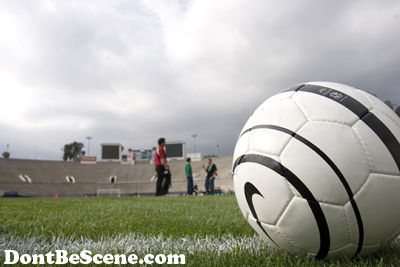

In [ ]:
image = Image.open('/content/imagenet10/test_set/ahololoyfh.JPEG')
image

In [ ]:
input = data_transform(image)
input

In [ ]:
model

Net(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop): Dropout2d(p=0.2, inplace=False)
  (fc): Linear(in_features=24576, out_features=10, bias=True)
)

In [ ]:
input = data_transform(image)

input = input.view(1,3, 128,128)

output = model(input)

prediction = int(torch.max(output.data, 1)[1].numpy())
print(prediction)


7


In [ ]:
import glob, os
predicted_test = []

os.chdir("/content/imagenet10/test_set")
for file in glob.glob("*.JPEG"):
  
  image = Image.open(file)
  input = data_transform(image)
  input = data_transform(image)
  input = input.view(1,3, 128,128)
  output = model(input)
  prediction = int(torch.max(output.data, 1)[1].numpy())
  predicted_test.append(prediction)
  
a2.insert(loc=1, column='predicted_class_id', value=predicted_test)
  
  

In [ ]:
a2

,image_name,predicted_class_id
0,aqfbjsmdiq.JPEG,5
1,vhhqybtgmj.JPEG,2
2,nhnjcyptpc.JPEG,3
3,wuhrzjfimh.JPEG,7
4,wcekuofykd.JPEG,1
...,...,...
995,vwhfetogsw.JPEG,0
996,ljtaaagqwe.JPEG,3
997,tanmgecyou.JPEG,6
998,gpuaheidml.JPEG,5


In [ ]:
a2.to_csv('/content/predicted_result.csv', index=False)